In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import ROOT
import numpy as np
from scipy.optimize import curve_fit
import root_numpy as rnp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import uproot # uproot examples: https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf

Welcome to JupyROOT 6.22/02


In [3]:
def GetCut(tree):
    cut = np.where((tree['passed_xy_thresh'].array() == True) \
               & (tree['passed_z_thresh'].array() == True) \
               & (tree['n_x_ch_abovenoise'].array() > 0) \
               & (tree['n_y_ch_abovenoise'].array() > 0) \
               & (tree['m_nOPCal'].array() < (1.077*tree['m_nQ'].array()+313)) \
               & (tree['m_nOPCal'].array() > (0.597*tree['m_nQ'].array()-216)) \
               & (tree['standoff'].array() > 0) \
               & (tree['m_DNNvalue'].array() > 0.0) \
               & (tree['energy'].array() > 700) \
               & (tree['energy'].array() < 3500) \
              )
    return cut         

In [4]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [5]:
File = "/p/vast1/nexo/data/merged-v4/Baseline2019_%s_%s.root"

In [6]:
bb0n = uproot.open("/p/vast1/nexo/data/merged-v4/Baseline2019_%s_%s.root" % ('bb0n', 'FullLXe'))['tree']

In [7]:
bb0n_cut = GetCut(bb0n)

In [8]:
bb0n.keys()

[b'passed_z_thresh',
 b'passed_xy_thresh',
 b'n_x_ch_abovenoise',
 b'n_y_ch_abovenoise',
 b'r_max_simple',
 b'r_max_3d',
 b'lower_z',
 b'upper_z',
 b'standoff',
 b'standoff_r',
 b'standoff_z',
 b'max_r_mctruth',
 b'lower_z_mctruth',
 b'upper_z_mctruth',
 b'standoff_mctruth',
 b'standoff_r_mctruth',
 b'standoff_z_mctruth',
 b'max_r_active_mctruth',
 b'lower_z_active_mctruth',
 b'upper_z_active_mctruth',
 b'standoff_active_mctruth',
 b'standoff_r_active_mctruth',
 b'standoff_z_active_mctruth',
 b'energy',
 b'energy_mctruth_allLXe',
 b'energy_mctruth_inTPC',
 b'm_nQ',
 b'm_nOPCal',
 b'm_nOPCollected',
 b'm_DNNvalue',
 b'NESTBugFound',
 b'ratio',
 b'weight',
 b'isotope']

In [9]:
h,hx = np.histogram(bb0n['energy'].array()[bb0n_cut], bins=np.linspace(700,3500,1000))

In [17]:
Xmin = 2410.0
Xmax = 2510.0
cut = np.where((hx>Xmin) & (hx<Xmax))
popt, pcov = curve_fit(gaus, hx[cut], h[cut], p0=[1E7,2458,10])

Energy ROI: 2456.5±19.3 = 2437.2 - 2475.7


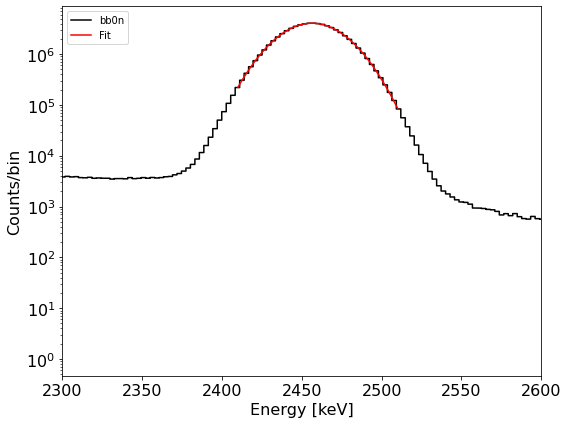

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Energy [keV]', fontsize=16)
plt.ylabel('Counts/bin', fontsize=16)

plt.step(hx[:-1],h, label='bb0n' , color='k', where='mid')
plt.plot(np.linspace(Xmin,Xmax,500), gaus(np.linspace(Xmin,Xmax,500), *popt), lw=1.5, label = 'Fit', color='red')
print("Energy ROI: %.1f±%.1f = %.1f - %.1f" % (popt[1], popt[2], popt[1]-popt[2], popt[1]+popt[2]))

plt.xlim(1000,3000)
plt.xlim(2300,2600)
plt.yscale('log')
plt.legend(loc='upper left')
fig.tight_layout()